In [1]:
!pip install anndata

In [3]:
import pandas as pd
import anndata as ad
import numpy as np

In [4]:
cibersortx_df = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/CIBERSORTx_Job6_Results.csv", index_col=0)

In [5]:
cibersortx_df.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,,,,,,,,,,,
3174.V08.0000373111.5104.SL.0001,0.005974,0.005487,0.000000,0.0,0.270177,0.100864,0.016962,0,0.0,0.0,...,0.0,0.0,0.000142,0.013317,0.0,0.0,0.250853,0,0.885423,0.573993
3201.BL.PP0016.0526.5104.SL.0002,0.042858,0.000000,0.000000,0.0,0.171549,0.129150,0.013136,0,0.0,0.0,...,0.0,0.0,0.002955,0.011056,0.0,0.0,0.381806,0,0.877031,0.546133
3057.V06.0003125874.5104.SL.0003,0.024895,0.000000,0.000989,0.0,0.140564,0.129842,0.016171,0,0.0,0.0,...,0.0,0.0,0.006567,0.004951,0.0,0.0,0.406018,0,0.896974,0.514527
4126.V04.0003179818.5104.SL.0004,0.008782,0.000000,0.000000,0.0,0.174572,0.084512,0.016647,0,0.0,0.0,...,0.0,0.0,0.000737,0.006639,0.0,0.0,0.386019,0,0.863534,0.549632
4117.BL.0003164601.5104.SL.0005,0.021231,0.000000,0.000000,0.0,0.255820,0.093761,0.010232,0,0.0,0.0,...,0.0,0.0,0.001050,0.010539,0.0,0.0,0.302367,0,0.872240,0.573251


In [6]:
cibersortx_df.shape

(4756, 25)

In [7]:
celltype_var = cibersortx_df.var(axis=0).sort_values(ascending=False)

In [8]:
celltype_var.head(10)

Neutrophils                     0.004979
Monocytes                       0.002575
T cells CD4 naive               0.001809
RMSE                            0.001549
T cells CD4 memory resting      0.001216
NK cells resting                0.000578
Correlation                     0.000417
B cells naive                   0.000255
T cells CD8                     0.000099
T cells CD4 memory activated    0.000080
dtype: float64

In [9]:
ppmi_adata = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")
ppmi_adata_df = ppmi_adata.to_df()

In [10]:
ppmi_adata.obs

,Sample,Diagnosis,Visit,Gender,Patient,Genetic_Group,Age_Group
3174.V08.0000373111.5104.SL.0001,3174.V08.0000373111.5104.SL.0001,PD,V08,Male,3174,SRDC,50-70
3201.BL.PP0016.0526.5104.SL.0002,3201.BL.PP0016.0526.5104.SL.0002,Control,BL,Female,3201,None,50-70
3057.V06.0003125874.5104.SL.0003,3057.V06.0003125874.5104.SL.0003,Control,V06,Female,3057,None,50-70
4126.V04.0003179818.5104.SL.0004,4126.V04.0003179818.5104.SL.0004,PD,V04,Male,4126,SRDC,50-70
4117.BL.0003164601.5104.SL.0005,4117.BL.0003164601.5104.SL.0005,PD,BL,Female,4117,SRDC,50-70
...,...,...,...,...,...,...,...
41314.V02.0003314545.5104.SL.4890,41314.V02.0003314545.5104.SL.4890,Genetic Cohort,V02,Female,41314,LRRK2,50-70
42308.V02.0003376702.5104.SL.4891,42308.V02.0003376702.5104.SL.4891,Genetic Cohort,V02,Male,42308,GBA,50-70
42306.V02.0003376763.5104.SL.4892,42306.V02.0003376763.5104.SL.4892,Genetic Cohort,V02,Male,42306,LRRK2,50-70
1009.POOL.0003203630.5104.SL.4893,1009.POOL.0003203630.5104.SL.4893,HCPOOL,Unk,Unk,1010,Unknown,NaN


In [12]:
cibersortx_df = cibersortx_df.join(ppmi_adata.obs[['Diagnosis', 'Visit', 'Gender', 'Genetic_Group', 'Age_Group']])

ValueError: columns overlap but no suffix specified: Index(['Diagnosis', 'Visit', 'Gender', 'Genetic_Group', 'Age_Group'], dtype='object')

In [13]:
cibersortx_df.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Eosinophils,Neutrophils,P-value,Correlation,RMSE,Diagnosis,Visit,Gender,Genetic_Group,Age_Group
Mixture,,,,,,,,,,,,,,,,,,,,,
3174.V08.0000373111.5104.SL.0001,0.005974,0.005487,0.000000,0.0,0.270177,0.100864,0.016962,0,0.0,0.0,...,0.0,0.250853,0,0.885423,0.573993,PD,V08,Male,SRDC,50-70
3201.BL.PP0016.0526.5104.SL.0002,0.042858,0.000000,0.000000,0.0,0.171549,0.129150,0.013136,0,0.0,0.0,...,0.0,0.381806,0,0.877031,0.546133,Control,BL,Female,None,50-70
3057.V06.0003125874.5104.SL.0003,0.024895,0.000000,0.000989,0.0,0.140564,0.129842,0.016171,0,0.0,0.0,...,0.0,0.406018,0,0.896974,0.514527,Control,V06,Female,None,50-70
4126.V04.0003179818.5104.SL.0004,0.008782,0.000000,0.000000,0.0,0.174572,0.084512,0.016647,0,0.0,0.0,...,0.0,0.386019,0,0.863534,0.549632,PD,V04,Male,SRDC,50-70
4117.BL.0003164601.5104.SL.0005,0.021231,0.000000,0.000000,0.0,0.255820,0.093761,0.010232,0,0.0,0.0,...,0.0,0.302367,0,0.872240,0.573251,PD,BL,Female,SRDC,50-70


/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_6146/635097887.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cibersortx_df_grouped = cibersortx_df.groupby('Diagnosis')[cell_types].mean()


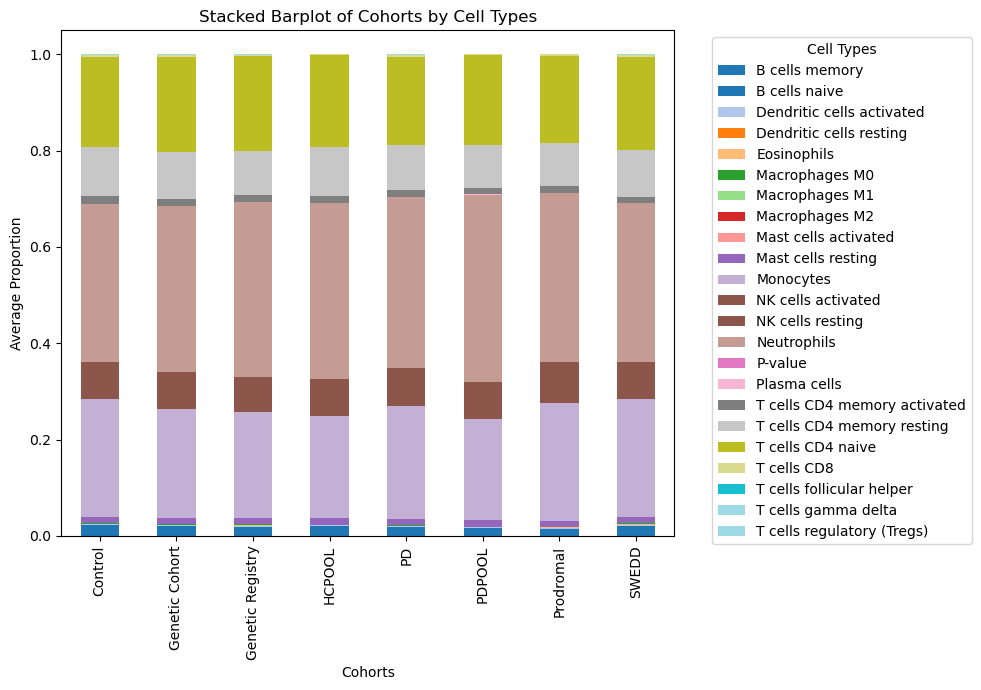

In [19]:
import matplotlib.pyplot as plt

exclude_cols = ['P-Value', 'Correlation', 'RMSE']
cell_types = cibersortx_df.columns.difference(exclude_cols + ['Diagnosis', 'Visit', 'Gender', 'Genetic_Group', 'Age_Group'])  # Exclude metadata and specified columns
cibersortx_df_grouped = cibersortx_df.groupby('Diagnosis')[cell_types].mean()

cibersortx_df_grouped.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')
plt.title('Stacked Barplot of Cohorts by Cell Types')
plt.ylabel('Average Proportion')
plt.xlabel('Cohorts')
plt.legend(title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_6146/2055086326.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cibersortx_df_grouped = cibersortx_df.groupby('Age_Group')[cell_types].mean()


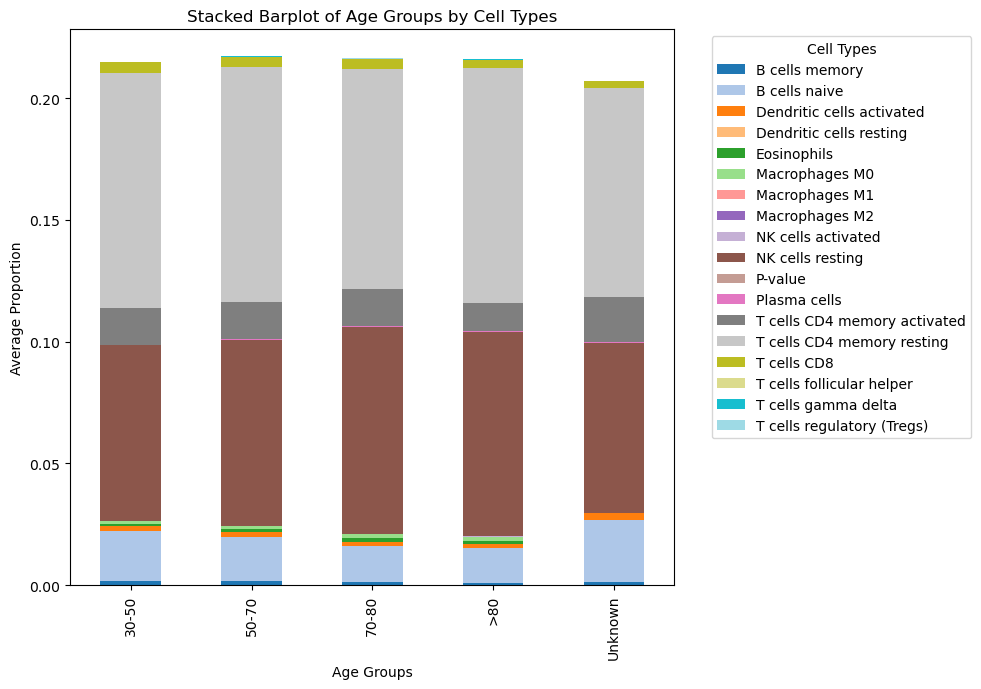

In [28]:
cibersortx_df_grouped = cibersortx_df.groupby('Age_Group')[cell_types].mean()

cibersortx_df_grouped.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')
plt.title('Stacked Barplot of Age Groups by Cell Types')
plt.ylabel('Average Proportion')
plt.xlabel('Age Groups')
plt.legend(title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_9447/150894941.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cibersortx_df_grouped = cibersortx_df.groupby('Genetic_Group')[cell_types].mean()


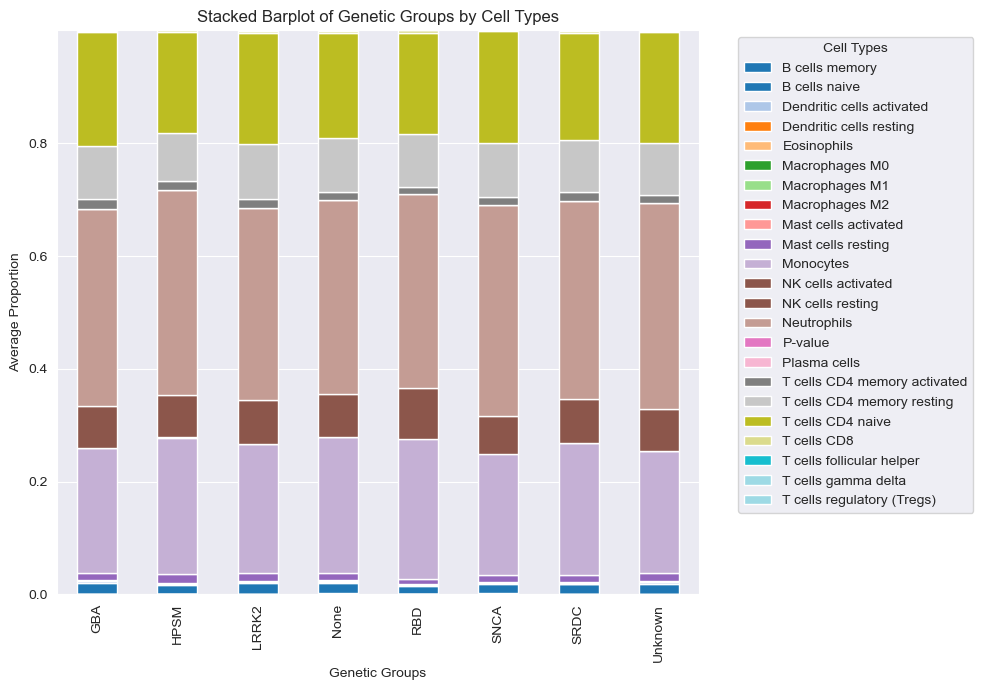

In [17]:
cibersortx_df_grouped = cibersortx_df.groupby('Genetic_Group')[cell_types].mean()

cibersortx_df_grouped.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')
plt.title('Stacked Barplot of Genetic Groups by Cell Types')
plt.ylabel('Average Proportion')
plt.xlabel('Genetic Groups')
plt.legend(title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_9447/380187099.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cibersortx_df_grouped = cibersortx_df.groupby('Gender')[cell_types].mean()


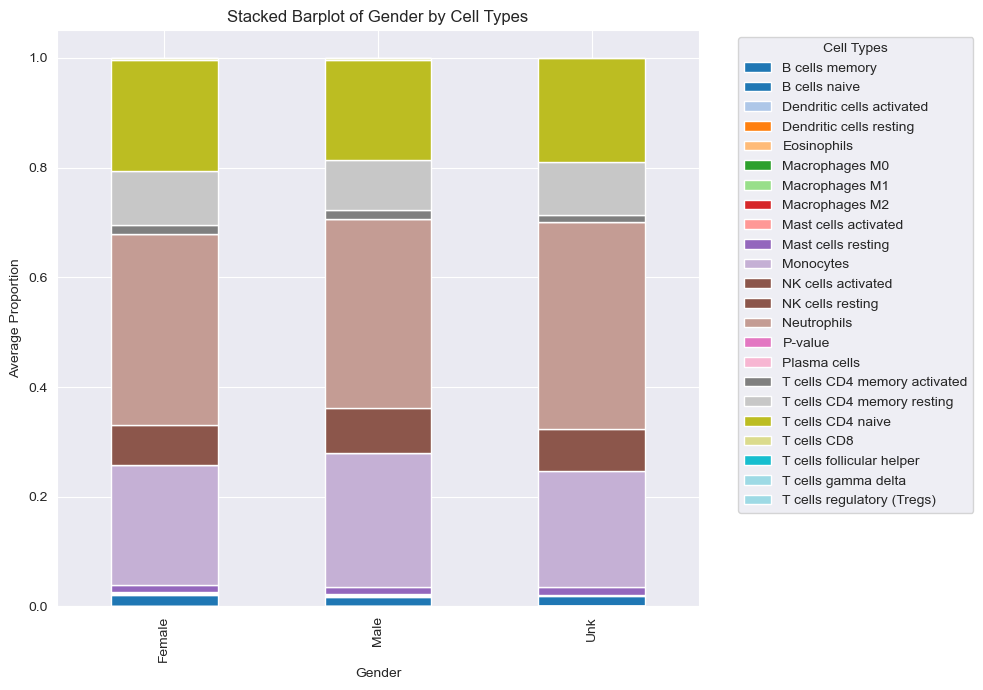

In [18]:
cibersortx_df_grouped = cibersortx_df.groupby('Gender')[cell_types].mean()

cibersortx_df_grouped.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')
plt.title('Stacked Barplot of Gender by Cell Types')
plt.ylabel('Average Proportion')
plt.xlabel('Gender')
plt.legend(title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
cibersortx_df.to_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/cibersortx_metadata_df.csv")

In [70]:
cibersortx_df_pd = cibersortx_df[cibersortx_df['Diagnosis'] == 'PD'].drop(['P-value', 'Correlation', 'RMSE', 'Visit', 'Gender', 'Genetic_Group', 'Age_Group', 'Diagnosis'], axis=1)
cibersortx_df_control = cibersortx_df[cibersortx_df['Diagnosis'] == 'Control'].drop(['P-value', 'Correlation', 'RMSE', 'Visit', 'Gender', 'Genetic_Group', 'Age_Group', 'Diagnosis'], axis=1)

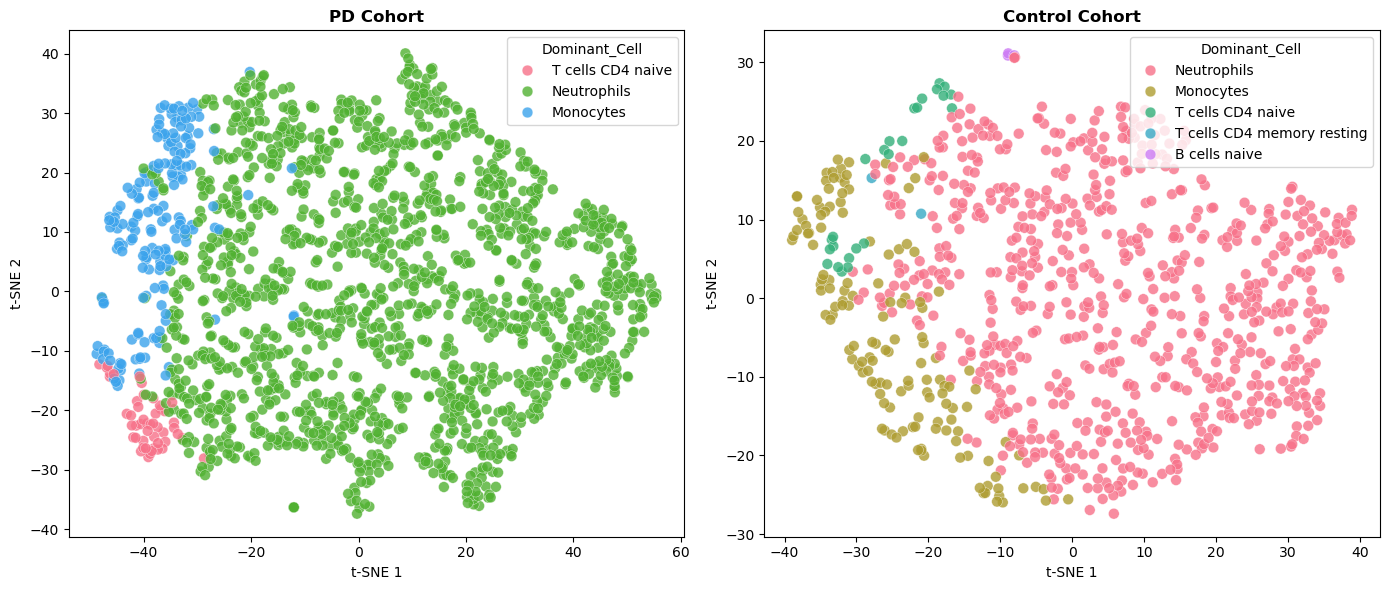

In [71]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data - assuming df has cell type columns and diagnosis column
cell_types = [col for col in cibersortx_df_control.columns if col != 'Diagnosis']

# Run t-SNE
def run_tsne(data):
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    return tsne.fit_transform(data[cell_types])

# Add t-SNE coordinates to dataframe
cibersortx_df_pd['tSNE1'], cibersortx_df_pd['tSNE2'] = run_tsne(cibersortx_df_pd)[:, 0], run_tsne(cibersortx_df_pd)[:, 1]
cibersortx_df_pd['Dominant_Cell'] = cibersortx_df_pd[cell_types].idxmax(axis=1)

cibersortx_df_control['tSNE1'], cibersortx_df_control['tSNE2'] = run_tsne(cibersortx_df_control)[:, 0], run_tsne(cibersortx_df_control)[:, 1]
cibersortx_df_control['Dominant_Cell'] = cibersortx_df_control[cell_types].idxmax(axis=1)

# Create the plot
plt.figure(figsize=(14, 6))

# PD Cohort
plt.subplot(1, 2, 1)
sns.scatterplot(data=cibersortx_df_pd, x='tSNE1', y='tSNE2',
                hue='Dominant_Cell', palette='husl',
                s=60, alpha=0.8, edgecolor='w', linewidth=0.3)
plt.title('PD Cohort', fontweight='bold')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Control Cohort
plt.subplot(1, 2, 2)
sns.scatterplot(data=cibersortx_df_control, x='tSNE1', y='tSNE2',
                hue='Dominant_Cell', palette='husl',
                s=60, alpha=0.8, edgecolor='w', linewidth=0.3)
plt.title('Control Cohort', fontweight='bold')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

In [81]:
cibersortx_df_snca = cibersortx_df[cibersortx_df['Genetic_Group'] == 'SNCA'].drop(['P-value', 'Correlation', 'RMSE', 'Visit', 'Gender', 'Genetic_Group', 'Age_Group'], axis=1)

cibersortx_df_lrrk2 = cibersortx_df[cibersortx_df['Genetic_Group'] == 'LRRK2'].drop(['P-value', 'Correlation', 'RMSE', 'Visit', 'Gender', 'Genetic_Group', 'Age_Group'], axis=1)

cibersortx_df_gba = cibersortx_df[cibersortx_df['Genetic_Group'] == 'GBA'].drop(['P-value', 'Correlation', 'RMSE', 'Visit', 'Gender', 'Genetic_Group', 'Age_Group'], axis=1)

In [78]:
cibersortx_df

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Eosinophils,Neutrophils,P-value,Correlation,RMSE,Diagnosis,Visit,Gender,Genetic_Group,Age_Group
Mixture,,,,,,,,,,,,,,,,,,,,,
3174.V08.0000373111.5104.SL.0001,0.005974,0.005487,0.000000,0.000000,0.270177,0.100864,0.016962,0,0.0,0.0,...,0.0,0.250853,0,0.885423,0.573993,PD,V08,Male,SRDC,50-70
3201.BL.PP0016.0526.5104.SL.0002,0.042858,0.000000,0.000000,0.000000,0.171549,0.129150,0.013136,0,0.0,0.0,...,0.0,0.381806,0,0.877031,0.546133,Control,BL,Female,None,50-70
3057.V06.0003125874.5104.SL.0003,0.024895,0.000000,0.000989,0.000000,0.140564,0.129842,0.016171,0,0.0,0.0,...,0.0,0.406018,0,0.896974,0.514527,Control,V06,Female,None,50-70
4126.V04.0003179818.5104.SL.0004,0.008782,0.000000,0.000000,0.000000,0.174572,0.084512,0.016647,0,0.0,0.0,...,0.0,0.386019,0,0.863534,0.549632,PD,V04,Male,SRDC,50-70
4117.BL.0003164601.5104.SL.0005,0.021231,0.000000,0.000000,0.000000,0.255820,0.093761,0.010232,0,0.0,0.0,...,0.0,0.302367,0,0.872240,0.573251,PD,BL,Female,SRDC,50-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41314.V02.0003314545.5104.SL.4890,0.003238,0.000000,0.000712,0.007914,0.170286,0.040140,0.011138,0,0.0,0.0,...,0.0,0.363594,0,0.914621,0.483237,Genetic Cohort,V02,Female,LRRK2,50-70
42308.V02.0003376702.5104.SL.4891,0.017427,0.000000,0.000000,0.018752,0.122926,0.085326,0.001068,0,0.0,0.0,...,0.0,0.372368,0,0.857026,0.566706,Genetic Cohort,V02,Male,GBA,50-70
42306.V02.0003376763.5104.SL.4892,0.016619,0.000000,0.000000,0.017977,0.170416,0.064271,0.008222,0,0.0,0.0,...,0.0,0.283901,0,0.874863,0.569368,Genetic Cohort,V02,Male,LRRK2,50-70


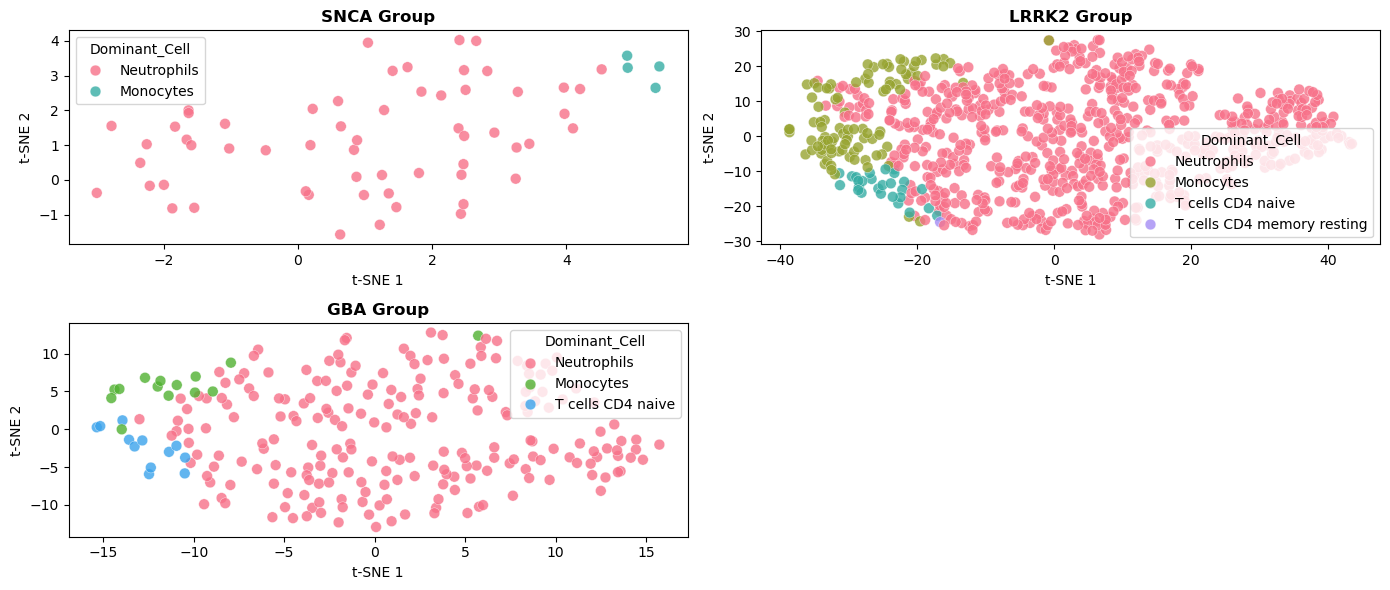

In [82]:
def run_tsne(data):
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    return tsne.fit_transform(data[cell_types])

# Add t-SNE coordinates to dataframe
cibersortx_df_snca['tSNE1'], cibersortx_df_snca['tSNE2'] = run_tsne(cibersortx_df_snca)[:, 0], run_tsne(cibersortx_df_snca)[:, 1]
cibersortx_df_snca['Dominant_Cell'] = cibersortx_df_snca[cell_types].idxmax(axis=1)

cibersortx_df_lrrk2['tSNE1'], cibersortx_df_lrrk2['tSNE2'] = run_tsne(cibersortx_df_lrrk2)[:, 0], run_tsne(cibersortx_df_lrrk2)[:, 1]
cibersortx_df_lrrk2['Dominant_Cell'] = cibersortx_df_lrrk2[cell_types].idxmax(axis=1)

cibersortx_df_gba['tSNE1'], cibersortx_df_gba['tSNE2'] = run_tsne(cibersortx_df_gba)[:, 0], run_tsne(cibersortx_df_gba)[:, 1]
cibersortx_df_gba['Dominant_Cell'] = cibersortx_df_gba[cell_types].idxmax(axis=1)

plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(data=cibersortx_df_snca, x='tSNE1', y='tSNE2',
                hue='Dominant_Cell', palette='husl',
                s=60, alpha=0.8, edgecolor='w', linewidth=0.3)
plt.title('SNCA Group', fontweight='bold')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.subplot(2, 2, 2)
sns.scatterplot(data=cibersortx_df_lrrk2, x='tSNE1', y='tSNE2',
                hue='Dominant_Cell', palette='husl',
                s=60, alpha=0.8, edgecolor='w', linewidth=0.3)
plt.title('LRRK2 Group', fontweight='bold')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.subplot(2, 2, 3)
sns.scatterplot(data=cibersortx_df_gba, x='tSNE1', y='tSNE2',
                hue='Dominant_Cell', palette='husl',
                s=60, alpha=0.8, edgecolor='w', linewidth=0.3)
plt.title('GBA Group', fontweight='bold')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

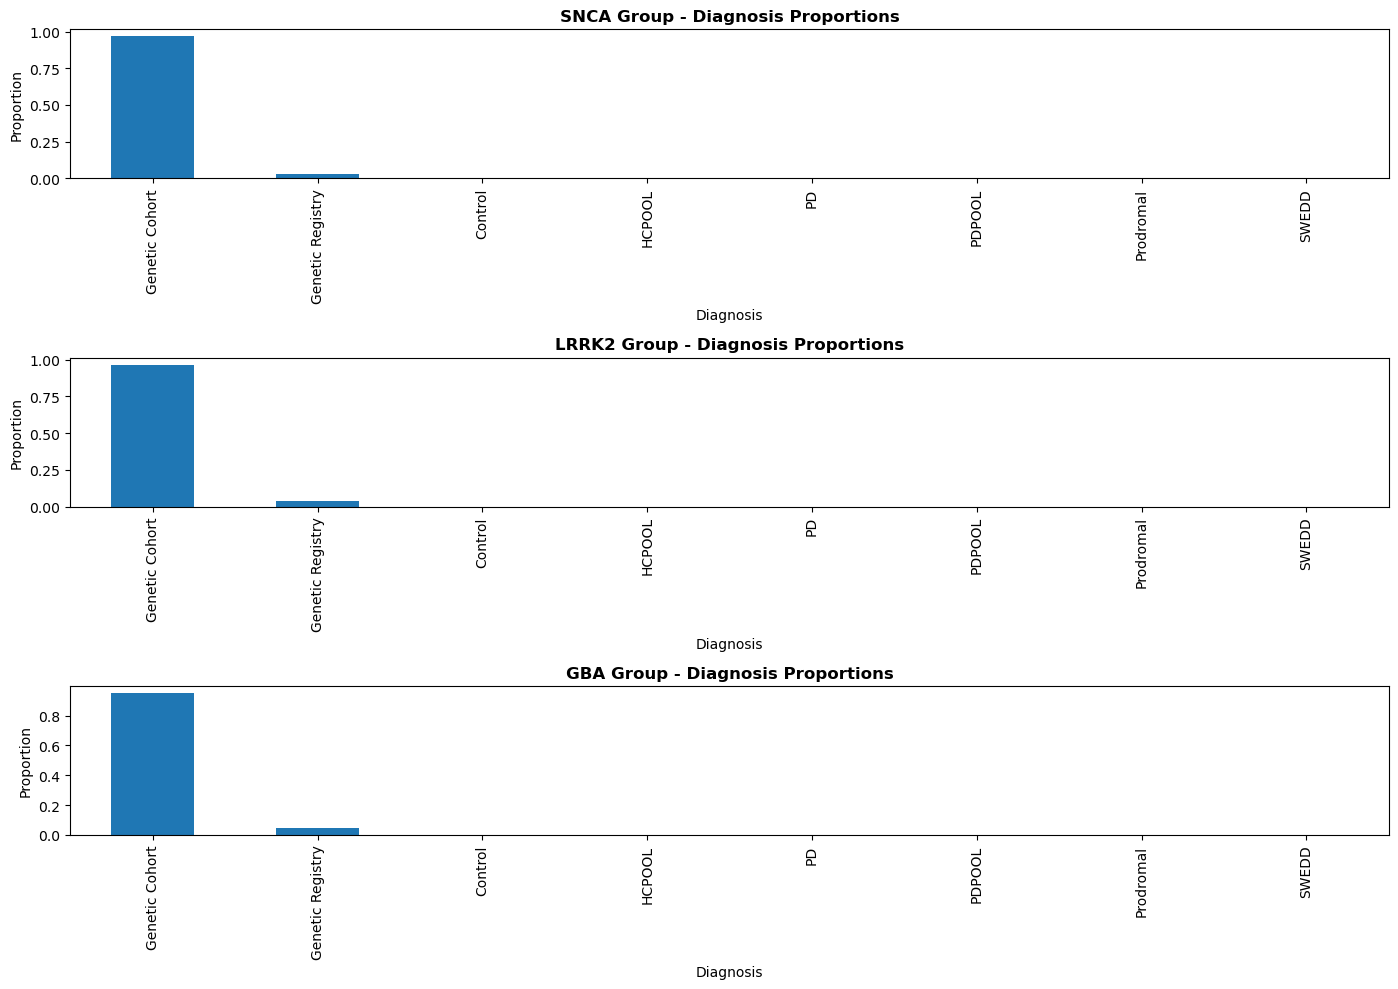

In [85]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
cibersortx_df_snca['Diagnosis'].value_counts(normalize=True).plot(kind='bar', colormap='tab10')
plt.title('SNCA Group - Diagnosis Proportions', fontweight='bold')
plt.ylabel('Proportion')
plt.xlabel('Diagnosis')

plt.subplot(3, 1, 2)
cibersortx_df_lrrk2['Diagnosis'].value_counts(normalize=True).plot(kind='bar', colormap='tab10')
plt.title('LRRK2 Group - Diagnosis Proportions', fontweight='bold')
plt.ylabel('Proportion')
plt.xlabel('Diagnosis')

plt.subplot(3, 1, 3)
cibersortx_df_gba['Diagnosis'].value_counts(normalize=True).plot(kind='bar', colormap='tab10')
plt.title('GBA Group - Diagnosis Proportions', fontweight='bold')
plt.ylabel('Proportion')
plt.xlabel('Diagnosis')

plt.tight_layout()
plt.show()

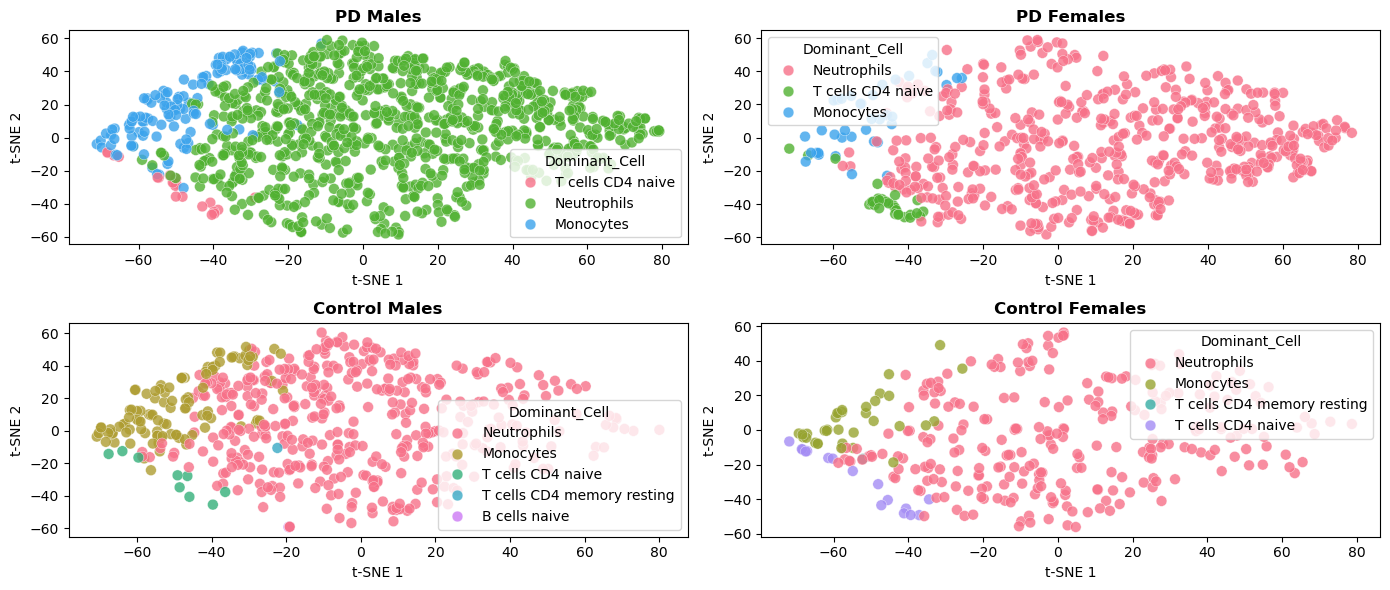

In [91]:
def run_tsne(data):
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    return tsne.fit_transform(data[cell_types])

cibersortx_df_tsne = cibersortx_df.copy()

# Add t-SNE coordinates to dataframe
cibersortx_df_tsne['tSNE1'], cibersortx_df_tsne['tSNE2'] = run_tsne(cibersortx_df_tsne)[:, 0], run_tsne(cibersortx_df_tsne)[:, 1]
cibersortx_df_tsne['Dominant_Cell'] = cibersortx_df_tsne[cell_types].idxmax(axis=1)

plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(data=cibersortx_df_tsne[(cibersortx_df_tsne['Gender'] == 'Male') & (cibersortx_df_tsne['Diagnosis'] == 'PD')], x='tSNE1', y='tSNE2',
                hue='Dominant_Cell', palette='husl',
                s=60, alpha=0.8, edgecolor='w', linewidth=0.3)
plt.title('PD Males', fontweight='bold')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.subplot(2, 2, 2)
sns.scatterplot(data=cibersortx_df_tsne[(cibersortx_df_tsne['Gender'] == 'Female') & (cibersortx_df_tsne['Diagnosis'] == 'PD')], x='tSNE1', y='tSNE2',
                hue='Dominant_Cell', palette='husl',
                s=60, alpha=0.8, edgecolor='w', linewidth=0.3)
plt.title('PD Females', fontweight='bold')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.subplot(2, 2, 3)
sns.scatterplot(data=cibersortx_df_tsne[(cibersortx_df_tsne['Gender'] == 'Male') & (cibersortx_df_tsne['Diagnosis'] == 'Control')], x='tSNE1', y='tSNE2',
                hue='Dominant_Cell', palette='husl',
                s=60, alpha=0.8, edgecolor='w', linewidth=0.3)
plt.title('Control Males', fontweight='bold')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.subplot(2, 2, 4)
sns.scatterplot(data=cibersortx_df_tsne[(cibersortx_df_tsne['Gender'] == 'Female') & (cibersortx_df_tsne['Diagnosis'] == 'Control')], x='tSNE1', y='tSNE2',
                hue='Dominant_Cell', palette='husl',
                s=60, alpha=0.8, edgecolor='w', linewidth=0.3)
plt.title('Control Females', fontweight='bold')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()